# Project: Investigate TMDB Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
For this project __`TMDB Dataset`__ is used which has 10866 rows and 21 columns: -
   1. id                                 
   2. imdb_id                   
   3. popularity                
   4. budget                    
   5. revenue                   
   6. original_title            
   7. cast                      
   8. homepage                  
   9. director                  
   10. tagline                  
   11. keywords                 
   12. overview               
   13. runtime               
   14. genres                
   15. production_companies   
   16. release_date           
   17. vote_count              
   18. vote_average          
   19. release_year            
   20. budget_adj            
   21. revenue_adj  


### Question(s) for Analysis
1. Which movies have achieved the highest and lowest profits?
2. Does the more the production company spends, the more the movie gets popular?
3. What is the optimal duration of a popular movie?
4. Does the film industry develop through years?
5. What are the most popular genres?

In [1]:
#importing the appropriate packages for this report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

In [2]:
#loading the dataset into a pandas dataframe to make the analysis process easier 
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Observation from the dataset: 
   <ul>
       <li>There is no currency is mentioned in the dataset for the [budjet, revenue, budget_adj and revenue_adj] so we will assume the dollar as an international currency</li>
       <li>The number of voters differs from a movie to the other, so we can not depend on the average vote as a measure of popularity</li>
   </ul>

## Data Cleaning
   For obtaining the optimum dataset, there are some procedures must be made:
   1. Removing the unused columns for this analysis.
   2. Removing any duplicated rows
   3. Removing the unrecorded data 
   4. Converting the types of some columns such as (budget, revenue and runtime)

### 1. Removing the unused columns
We don not need theses columns for the analysis
1. id 
2. imdb_id
3. homepage
4. tagline
5. keywords
6. overview
7. production companies
8. vote count      
9. vote_average
10. release date
11. budget_adj            
12. revenue_adj           

In [5]:
#removing the unused columns
columns_to_remove = ['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj', 'revenue_adj', 'vote_count', 'vote_average', 'release_date']
df.drop(columns_to_remove, axis = 1, inplace = True)

In [6]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   cast            10790 non-null  object 
 5   director        10822 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_year    10866 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 764.1+ KB


### 2. Removing duplicated rows

In [8]:
#checking for duplicated rows
df.duplicated().sum()

1

In [9]:
#removing duplicated rows from the dataframe
df.drop_duplicates(inplace = True)

In [10]:
#checking for removing duplicates
df[df.duplicated()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_year


### 3. Removing unrecorded data
we notice that there are
1. **76** missing values in **cast** column

2. **44** missing values in **director** column

3. **23** missing values in **genres** column

These values can nat be replaced by mean for example as they are not numeric data and missing these values would affect our analysis, so the best choice here is to remove them.

In [11]:
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_year       0
dtype: int64

In [12]:
#removing the missing values
df.dropna(inplace=True)

In [13]:
#checking 
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_year      0
dtype: int64

In [14]:
df.describe()

,popularity,budget,revenue,runtime,release_year
count,10731.000000,1.073100e+04,1.073100e+04,10731.000000,10731.000000
mean,0.652615,1.480365e+07,4.031989e+07,102.468829,2001.259622
std,1.004804,3.106456e+07,1.176524e+08,30.493873,12.820151
min,0.000188,0.000000e+00,0.000000e+00,0.000000,1960.000000
25%,0.210765,0.000000e+00,0.000000e+00,90.000000,1995.000000
50%,0.387081,0.000000e+00,0.000000e+00,99.000000,2006.000000
75%,0.720889,1.600000e+07,2.500000e+07,112.000000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000


>**We observe here from that summary statistics that the minimum value for budget, revenue and runtime is zero which is non logical, so these rows must be unrecorded rows which affects our analysis and even if they are numeric data but we can not replace them with the mean value as each one of them represent a single entity "which is a movie here", so the appropriate choice is to remove them**

In [15]:
#getting the indices of the rows of zero value in (runtime, budget and revenue) columns
unrecorded_data = df.query('budget == 0 or revenue == 0 or runtime == 0').index
print(len(unrecorded_data ))

6882


>There are 6882 unrecoeded data in our data set

In [16]:
#removing the unrecorded data
df.drop(index = unrecorded_data, inplace=True)

In [17]:
#checking the final dataset
check = df.query('budget == 0 or revenue == 0 or runtime == 0')
check

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_year


In [18]:
df.describe()

,popularity,budget,revenue,runtime,release_year
count,3849.000000,3.849000e+03,3.849000e+03,3849.000000,3849.000000
mean,1.192933,3.724886e+07,1.078148e+08,109.217459,2001.258249
std,1.475622,4.221699e+07,1.766175e+08,19.914141,11.285642
min,0.001117,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,0.463337,1.000000e+07,1.367069e+07,95.000000,1995.000000
50%,0.798582,2.400000e+07,4.490726e+07,106.000000,2004.000000
75%,1.374300,5.000000e+07,1.243052e+08,119.000000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,338.000000,2015.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      3849 non-null   float64
 1   budget          3849 non-null   int64  
 2   revenue         3849 non-null   int64  
 3   original_title  3849 non-null   object 
 4   cast            3849 non-null   object 
 5   director        3849 non-null   object 
 6   runtime         3849 non-null   int64  
 7   genres          3849 non-null   object 
 8   release_year    3849 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 300.7+ KB


### 4. Converting the datatypes to appropriate type

>We shall convert
**budget** column from int to float, **revenue** column from int to float and **runtime** column from int to float

In [20]:
df.budget = df.budget.astype(float)
df.revenue = df.revenue.astype(float)
df.runtime = df.runtime.astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      3849 non-null   float64
 1   budget          3849 non-null   float64
 2   revenue         3849 non-null   float64
 3   original_title  3849 non-null   object 
 4   cast            3849 non-null   object 
 5   director        3849 non-null   object 
 6   runtime         3849 non-null   float64
 7   genres          3849 non-null   object 
 8   release_year    3849 non-null   int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 300.7+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which movies have achieved the highest and lowest profits

#### Calculating the profit of a movie

In [22]:
df.insert(3, 'profit', df.revenue - df.budget)
df.head(2)

,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,release_year
0,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015
1,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015


In [23]:
def sep_str(s):
    #This is a function takes a string and changes its format 
    return s.replace('|', ', ')

def movie_profits(movie, case):
    '''
        This function takes a pandas dataframe and returns a pandas dataframe
        movie is a pandas dataframe
        case is a string        
    '''
    if case.lower() == 'highest':
        highest_movie = movie.profit.idxmax()
        details = pd.DataFrame(movie.loc[highest_movie])
        return details
    elif case.lower() == 'lowest':
        lowest_movie = movie.profit.idxmin()
        details  = pd.DataFrame(movie.loc[lowest_movie])
        return details

def display_movie(movie, case):
    '''
        This function take a pandas datadrame and used to display the movie information
    '''
    film = movie.loc['original_title'].iloc[0]
    year = movie.loc['release_year'].iloc[0]
    director = movie.loc['director'].iloc[0]
    heroes = sep_str(movie.loc['cast'].iloc[0])
    classification = sep_str(movie.loc['genres'].iloc[0])
    profit = movie.loc['profit'].iloc[0]
    if profit > 0:
        achievement = 'achieved'
    else:
        achievement = 'lost'
        profit = abs(profit)
    print("The movie of {} profit is \'{}\' which is released in {} and directed by {}\nThe heroes are: {}".format(case,film, year, director, heroes))
    print("The movie is classified as: {}".format(classification))
    print("This movie has {}: ${}\n". format(achievement ,profit))

In [24]:
display_movie(movie_profits(df, 'highest'), 'highest')
display_movie(movie_profits(df, 'lowest'), 'lowest')

The movie of highest profit is 'Avatar' which is released in 2009 and directed by James Cameron
The heroes are: Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang, Michelle Rodriguez
The movie is classified as: Action, Adventure, Fantasy, Science Fiction
This movie has achieved: $2544505847.0

The movie of lowest profit is 'The Warrior's Way' which is released in 2010 and directed by Sngmoo Lee
The heroes are: Kate Bosworth, Jang Dong-gun, Geoffrey Rush, Danny Huston, Ti Lung
The movie is classified as: Adventure, Fantasy, Action, Western, Thriller
This movie has lost: $413912431.0



<a id = 'q2'></a>
### Research Question 2 :Does the more the production company spends, the more the movie gets popular?

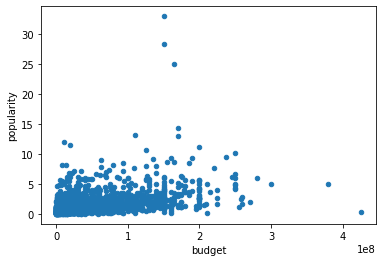

In [25]:
df.plot(x = 'budget' , y = 'popularity', kind = 'scatter');

> we notice that there is a correlation between the popularity of a movie and the budget of the movie, it is logical that the movie of higher budget will have higher quality and famous super stars that highly paid which will return by a success to the movie

### Research Question 3: What is the optimal duration of a popular movie?

In [26]:
df.runtime.describe()

count    3849.000000
mean      109.217459
std        19.914141
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

##### The distribution of the runtime of movies

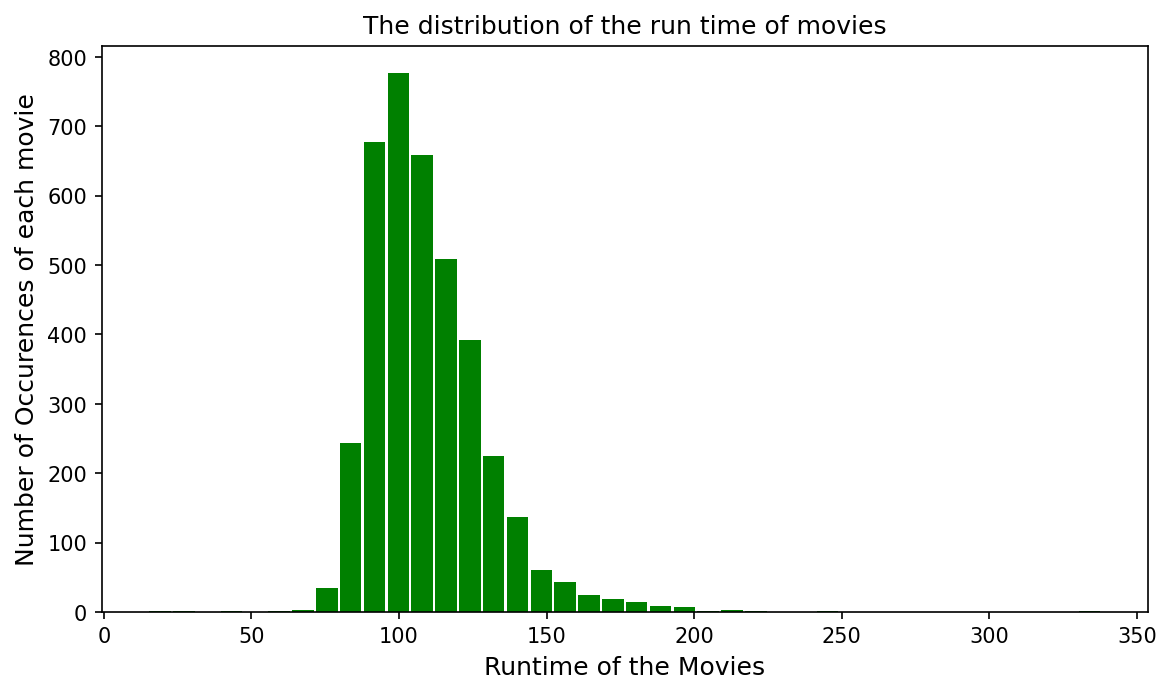

In [27]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 150)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 12, loc = 'center')
#On y-axis 
plt.ylabel('Number of Occurences of each movie', fontsize=12, loc = 'center')
#Name of the graph
plt.title('The distribution of the run time of movies', fontsize=12)

#giving a histogram plot
plt.hist(df.runtime, rwidth = 0.9, bins =40, color = 'green')
#displays the plot
plt.show()

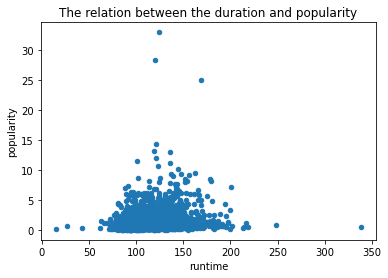

In [28]:
df.plot('runtime', 'popularity', kind = 'scatter', title = 'The relation between the duration and popularity');

> According to this scatter plot we find that the most popular movies are between 2 and 2.5 hours, we also notice that there is no relation between the runtime of the movie and its popularity, so we conclude that the movie duration is not a factor affecting its popularity 

### Research Question 4: Does the film industry develop through years?

**Does the film industry make profits by time**

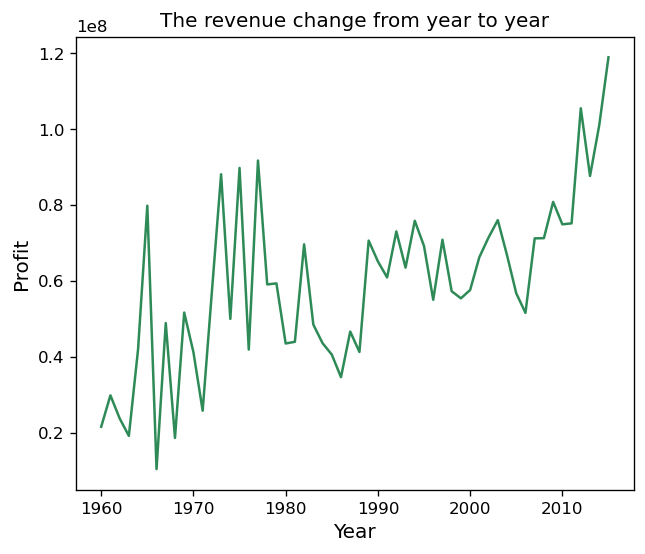

In [29]:
#Draw the line char for the change of the revenue
film_industry_devolpment = df.groupby('release_year')['profit'].mean()

plt.figure(figsize=(6,5), dpi= 120)

plt.plot(film_industry_devolpment, color = 'seagreen')
plt.title('The revenue change from year to year')
plt.xlabel('Year', fontsize = 12, loc = 'center')
plt.ylabel('Profit', fontsize = 12 , loc = 'center')

plt.show()

In [30]:
time_names = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
bins = [1960,1970,1980,1990,2000,2010,2020]
df['decade'] = pd.cut(df.release_year, bins, labels = time_names)

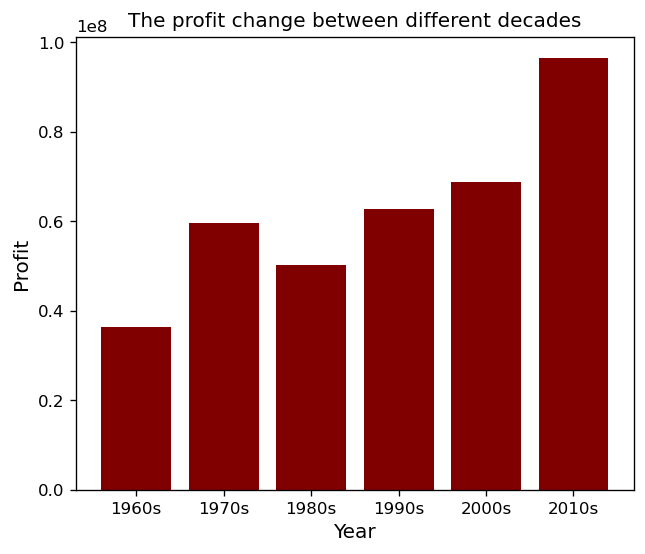

In [31]:
plt.figure(figsize=(6,5), dpi= 120)
heights = df.groupby('decade').profit.mean()
plt.bar(time_names ,heights, color = 'maroon')
plt.title('The profit change between different decades')
plt.xlabel('Year', fontsize = 12, loc = 'center')
plt.ylabel('Profit', fontsize = 12 , loc = 'center')

plt.show()

>**We notice that the film industry fluctuates in the same decade and this may be because of important events that prevents the audience from going to the cinema or watching the movie.
But through different decades the industry developes and the reason may be the development of social media and the network between different people and cultures made it easier for film makers to affect different people all over the world.**

### Research Question 5: What are the most popular genres?

In [32]:
df_genres = df[['release_year', 'genres', 'popularity']]
df_genres.head()

,release_year,genres,popularity
0,2015,Action|Adventure|Science Fiction|Thriller,32.985763
1,2015,Action|Adventure|Science Fiction|Thriller,28.419936
2,2015,Adventure|Science Fiction|Thriller,13.112507
3,2015,Action|Adventure|Science Fiction|Fantasy,11.173104
4,2015,Action|Crime|Thriller,9.335014


In [34]:
from itertools import chain
#seperating each movie into all its genres
def sep(s):
    return list(chain.from_iterable(s.str.split('|')))

# Calculate lengths of splits
lens = df_genres['genres'].str.split('|').map(len)

# Create new dataframe, repeating or chaining as appropriate
df_genres = pd.DataFrame({'release_year': np.repeat(df_genres['release_year'], lens),                       
                          'genres': sep(df_genres['genres']),
                          'popularity': np.repeat(df_genres['popularity'], lens)})

df_genres.head()

,release_year,genres,popularity
0,2015,Action,32.985763
0,2015,Adventure,32.985763
0,2015,Science Fiction,32.985763
0,2015,Thriller,32.985763
1,2015,Action,28.419936


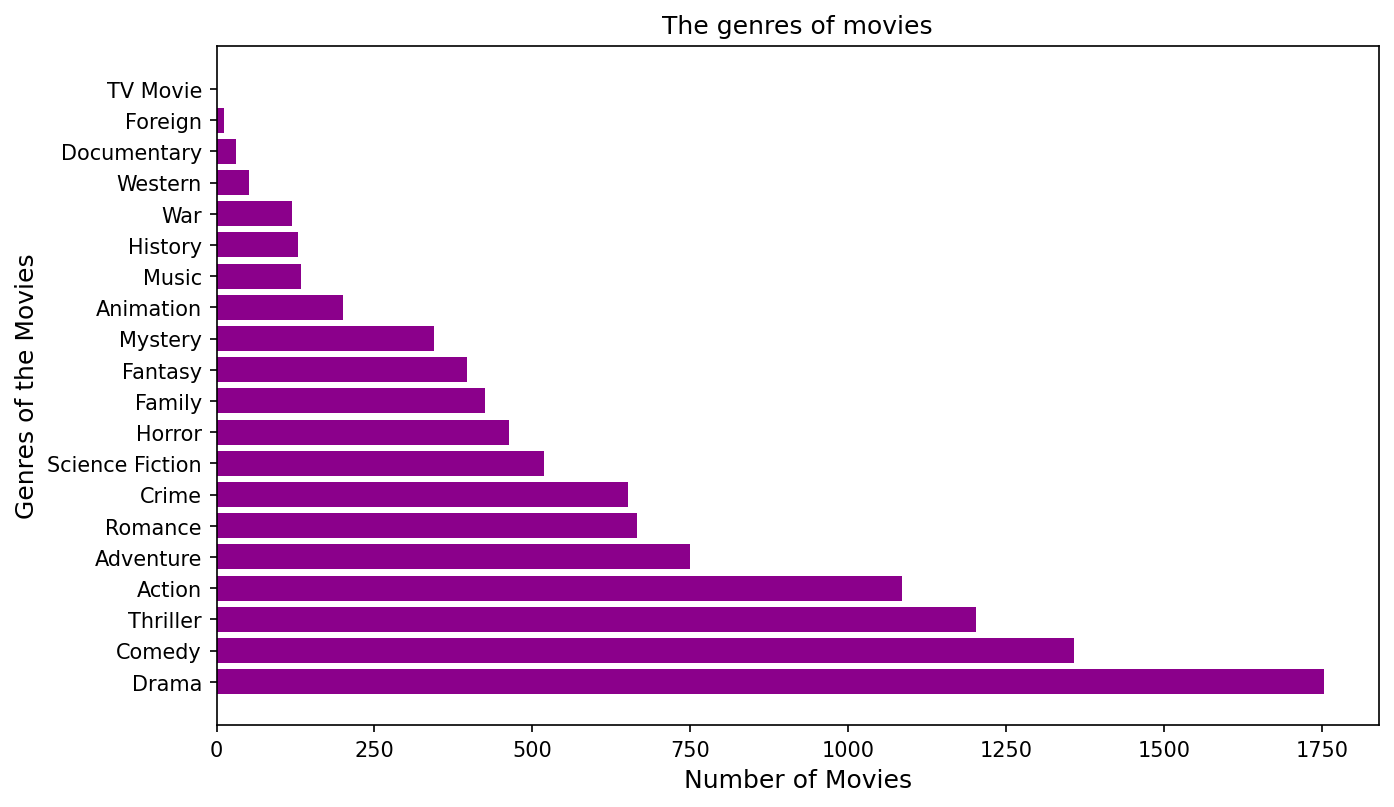

In [35]:
#plotting barchart for the number of movies for each genre
gnames = df_genres.genres.value_counts().index

#giving the figure size(width, height)
plt.figure(figsize=(10,6), dpi = 150)
#On x-axis 
plt.xlabel('Number of Movies', fontsize = 12, loc = 'center')
#On y-axis 
plt.ylabel('Genres of the Movies', fontsize=12, loc = 'center')
#Name of the graph
plt.title('The genres of movies', fontsize=12)

#giving a histogram plot
plt.barh(gnames ,df_genres.genres.value_counts(), color = 'darkmagenta')
#displays the plot
plt.show()

>We notice that the **drama and comedy** movies are the most popular movies

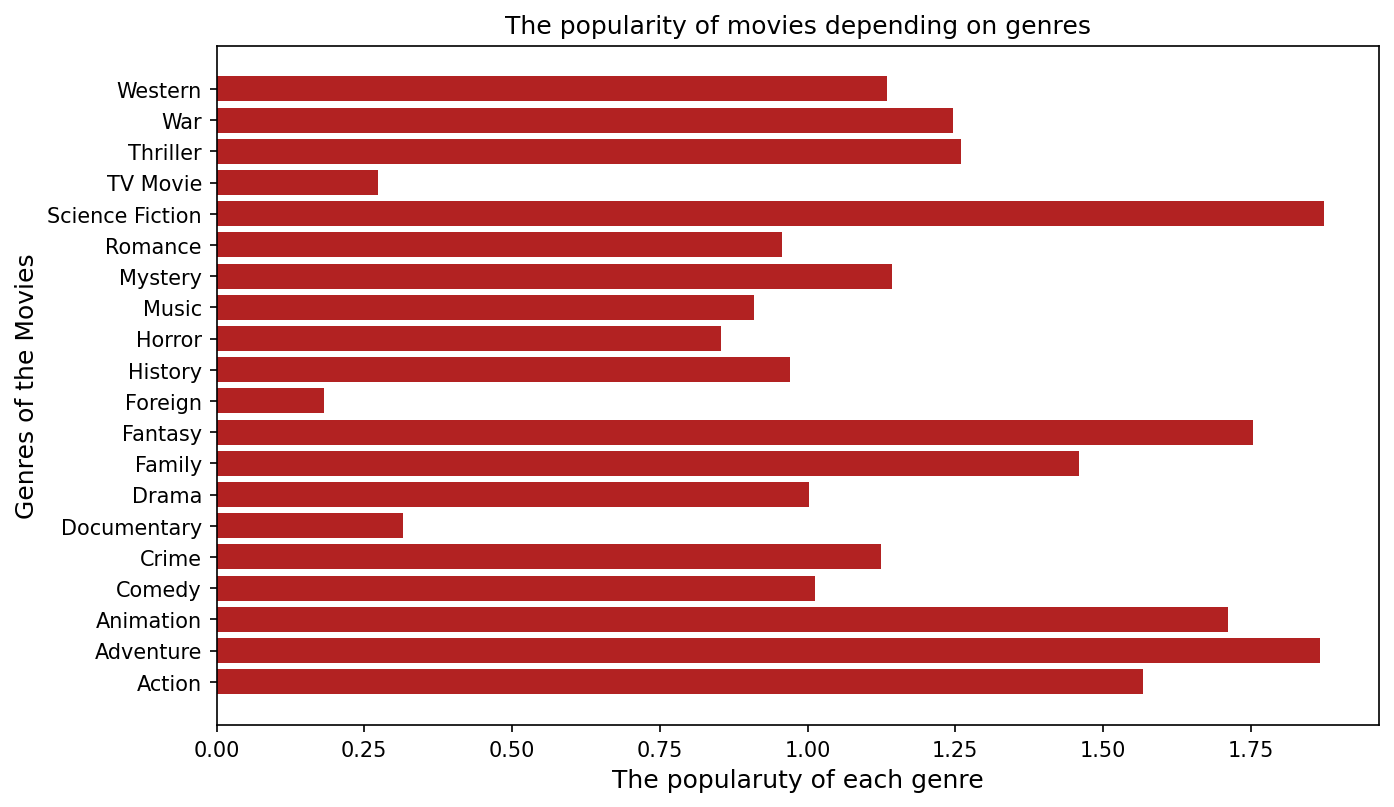

In [36]:
popular_genres = df_genres.groupby('genres')['popularity'].mean()
pnames = popular_genres.index
#giving the figure size(width, height)
plt.figure(figsize=(10,6), dpi = 150)
#On x-axis 
plt.xlabel('The popularuty of each genre', fontsize = 12, loc = 'center')
#On y-axis 
plt.ylabel('Genres of the Movies', fontsize=12, loc = 'center')
#Name of the graph
plt.title('The popularity of movies depending on genres', fontsize=12)

#giving a histogram plot
plt.barh(pnames ,popular_genres, color = 'firebrick')
#displays the plot
plt.show()

>We notice that the most popular movies are **(Adventure, Animation, Science Fiction and Fantasy)**

<a id='conclusions'></a>
## Conclusions

Based on all the analysis above we conclude that:
<ul>
    <li>The more the production company invests in a film, the better the movie is and so the more it is popular</li>
    <li>The optimal duration for a popular movie is nearly between 2 and 2.5 hours</li>
    <li>The film industry fluctuates in the same decade for some reasons, but we find that it developes and make higher profits through times</li>
    <li>The most produced movies through years are Drama and comedy movies</li>
    <li>The most popular movies through years are Adventure, Animation, Science Fiction and Fantasy</li>
    <li>We notice <a href ="#q2">here</a> that there are some outliers that affect the analysis, so if we try to predict the success or popularity of a movie, the results will be not accurate</li>
</ul>

**Limitations:** This analysis was done to data of movies that are cleaned and reduced from 10866 rows to 3849 rows, so the analysis may be not the most accurate one. It is assumed that the currency used in this dataset is the american dollar.

## References
1. https://pandas.pydata.org/docs/
2. https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe
3. https://stackoverflow.com/questions/67701679/key-error-none-of-int64index-dtype-int64-are-in-the-columns
4. https://stackoverflow.com/questions/64490082/array-length-does-not-match-index-length-pandas?noredirect=1&lq=1